<img src="../../Img/backdrop-wh.png" alt="Drawing" style="width: 300px;"/>

<div style="display: block; width: 100%; height: 100px;">

<p style="float: left;">
    <span style="font-weight: bold; font-size: 20px;">
        DIGHUM160 - Critical Digital Humanities 
        <br />
        Instructor: Tom van Nuenen<br />
        Final Project
    </span>
</p>

**Project title:** ```Analyzing the Intersection of Abortion and Patriarchal Relationship Dynamics```

**Student name:** ```Elle Morris-Benedict```

## Loading Packages

In [1]:
# setting up my environment
import pandas as pd
import json
import utils 
!pip install inflect
from tqdm import tqdm 
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
#%pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import logging
logging.getLogger().setLevel(logging.CRITICAL)
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
import matplotlib.pyplot as plt
#%matplotlib inline
import re
from pprint import pprint
import os
import numpy as np
import pickle
from gensim.models import Word2Vec
import multiprocessing
from sklearn.manifold import TSNE
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, LabelSet
output_notebook()
bokeh.io.output_notebook()
#!pip install Networkx
import networkx as nx
from utils import calculate_biased_words
try:
    import spacy
    nlp = spacy.load('en_core_web_sm')
    print("Spacy and en_core_web_sm are already installed.")
except:
    import spacy
    from spacy.cli.download import download
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')
from bokeh.io import show, output_notebook, output_file
#%pip install -U scikit-learn

[nltk_data] Error loading averaged_perceptron_tagger: HTTP Error 503:
[nltk_data]     Timed out while waiting
[nltk_data] Error loading vader_lexicon: HTTP Error 503: Request
[nltk_data]     timedout


Loading BokehJS ...

Loading BokehJS ...

Spacy and en_core_web_sm are already installed.


## Introduction
<img src="Images/accessmap.png" width="600" />
<img src="Images/accesslegend.png" width="400" />

**Figure 1:** ```Map of Abortion Access by State, 2024```

   After Roe v. Wade was overturned in 2021, as seen above in the map above, many states around the U.S. have opted to outright ban abortion procedures.

   Abortion is a highly polarized topic globally, particularly in the United States, where it has escalated into a considerable source of political tension. Growing up in a liberal bubble in North Carolina, I witnessed firsthand how the overturning of Roe v. Wade affected women, especially those in states with increasingly restrictive abortion laws. A poignant personal experience that compelled me to explore this issue was a recent call from my lifelong friend, who shared, in tears, that her abusive boyfriend had gotten her pregnant. Despite finally leaving him two weeks prior, she found herself unexpectedly pregnant and unable to confide in her orthodox Catholic parents, fearing their reaction. Due to recent law changes in North Carolina—made possible by the Supreme Court's decision—she learned she was ineligible for an abortion at 12 weeks and reluctantly reached out to her ex-boyfriend to drive her to Virginia, where abortions are permitted up to 24 weeks. Sadly, she has since reconciled with her abusive partner, and I attribute part of this cycle of dependency to the harsh abortion laws in North Carolina.

   This distressing experience prompted me to investigate the intersectionality of abortion laws and patriarchal dynamics in relationships. I have chosen to analyze the subreddit r/abortion, which has emerged as an essential platform for public discourse. It serves as a stigma-free online forum where individuals seek advice and support regarding all issues surrounding abortion, from physical and financial concerns to emotional struggles. Many submissions express urgent requests for advice, while others convey deep-seeded feelings of anger and disempowerment towards a predominantly male-controlled government regulating women's bodies. The community also seeks to understand opposing ideologies, such as pro-life versus pro-choice. Through these discussions, r/abortion acts as a repository of personal experiences and sentiments related to abortion, showcasing the diverse perspectives that shape the conversation. I am working with both the submissions and comments datasets in order to gauge the difference in tone (if any) between those posting about their struggles with abortion and users commenting underneath submissions.

   My research questions include: How does the language used in r/abortion reflect the power dynamics between men and women, especially within romantic and familial relationships? Do women with partners feel more or less comfortable seeking an abortion than single women? Does the involvement of a partner in the decision-making process exert more pressure than the loneliness of making the choice alone? By answering these questions, I aim to contribute to a more nuanced understanding of the personal and societal impacts of abortion laws on women's autonomy and decision-making processes. These inquiries are not only relevant to the individual lives of women but speak to broader societal norms that dictate how reproductive health is approached and discussed.

## Analysis

<img src="Images/community_rules.png" width="800" />

**Figure 2:** ```Community Guidelines for r/abortion```

The stipulation that users on this subreddit must refrain from publishing anti-abortion rhetoric or suggesting adoption shapes the sentiment, topics, and language bias illuminated on the page. By laying out these rules, the subreddit fosters a safe environment in which people can discuss abortion in a way that affirms their experiences and choices without worrying about criticism or retaliation from other parties.

This carefully constructed environment promotes language that highlights empathy, empowerment, and validation while at the same time lowering the frequency of guilt or shame that is frequently connected to the subject in larger social contexts. The ban of posts projecting alternative views on abortion guided my research to analyze the language bias between discussions of men vs. women within a pro-choice community--rather than delving into a more broadly researched comparison of gendered biases between pro-life and pro-choice individuals. This makes my research more niche because it is not just backing up the popular idea that the anti-abortion community's stance on the procedure is more about the patriarchy controlling women's bodies than faith or ethics. My project goes deeper, seeking to understand how the system of patriarchy in our society seeps into pro-choice discussions in regards to the impact male romantic partners and family members have on women seeking an abortion.


R/abortion's anonymity also has a role to play in the quantity and kind of linguistic prejudice that might arise in conversations about abortion. In contrast to conventional social settings, wherein one's personal identity and cultural perceptions may impede candid communication, the anonymity of online platforms enables people to openly discuss their experiences and feelings without worrying about shame or reprisals. Because of their anonymity, people may express their thoughts about reproductive options in a more authentic way, exposing a range of unfiltered viewpoints that would not otherwise be discussed in public. As a result, words that express vulnerability, rage, and helplessness in relation to social standards and the demands made by spouses and families may become more prevalent.

## Uploading Data

In [3]:
#comments from r/abortion
comments_df = pd.read_csv('Original Data/abortioncomments.csv')

#submissions from r/abortion
submissions_df = pd.read_csv('Original Data/abortionssubmissions.csv')

/var/folders/9q/6g8vlvxx6slcp43g6vr27drr0000gn/T/ipykernel_32102/1966832663.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv('Original Data/abortioncomments.csv')


## Text Preprocessing: Comments

In [4]:
# Glancing at column names
comments_df.head(1)

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
0,26202711227,t1_c1cf1dn,1294818655,[deleted],t3_cro39,t3_cro39,Amen brother,1.0,abortion,NaN,12.0


In [5]:
# Selecting all rows that don't have '[removed]' or '[deleted]'
comments_df = comments_df.loc[~comments_df['body'].isin(['[removed]', '[deleted]' ]),:]

# Selecting all rows that have >5 characters in body
comments_df = comments_df.loc[comments_df['body'].str.len() > 5]

# Dropping unneccesary columns
comments_df = comments_df.dropna(subset=['body'])
comments_df = comments_df.drop(['idint', 'idstr', 'created', 'parent', 'submission','subreddit','distinguish','textlen'], axis=1)

list(comments_df)

['author', 'body', 'score']

In [6]:
def process_text(text_comments):
    text_comments = text_comments.replace('\n', '')
    parsed = nlp(text_comments, disable=["tok2vec", "ner"])
# Gathering lowercased, lemmatized tokens that are not punctuation, space, or digit
    tokens_comments = [
        token.lemma_.lower() if token.lemma_ != '-PRON-'
        else token.lower_ 
        for token in parsed 
        if not (token.is_punct or token.is_space or token.is_digit)]
# Removing certain lemmatizations, and words that are not nouns or adjectives
    tokens_comments = [
        lemma
        for lemma in tokens_comments
        if not lemma in ["'s",  "’s", "’"]]
# Removing stop words
    tokens_comments = [
        token 
        for token in tokens_comments 
        if token not in spacy.lang.en.stop_words.STOP_WORDS]
    return ' '.join(tokens_comments)
def preprocess(comments_df, text_col_comments='body'):
    comments_df['pp_text'] = comments_df[text_col_comments].apply(process_text)
    return comments_df

In [7]:
comments_df = preprocess(comments_df, text_col_comments='body')

## Text Preprocessing: Submissions

In [8]:
# Glancing at column names
submissions_df.head(1)

,idint,idstr,created,nsfw,author,title,selftext,score,distinguish,textlen,num_comments,flair_text,flair_css_class,pp_text
0,21446325,t3_cro39,1279642491,0,terriblecomic,"Abortion: Great thing, or greatest thing?",Costs a bit of money and saves hundreds of tho...,6,NaN,64,2,NaN,NaN,costs bit money saves hundreds thousands_dollars


In [9]:
# Selecting all rows that don't have '[removed]' or '[deleted]'
submissions_df = submissions_df.loc[~submissions_df['selftext'].isin(['[removed]', '[deleted]' ]),:]

# Selecting all rows that have >5 characters in body
submissions_df = submissions_df.loc[submissions_df['selftext'].str.len() > 5]

# Dropping unneccesary columns
submissions_df = submissions_df.dropna(subset=['selftext'])
submissions_df = submissions_df.drop(['idint', 'idstr', 'created', 'nsfw', 'distinguish','textlen','flair_text','flair_css_class'], axis=1)

list(submissions_df)

['author', 'title', 'selftext', 'score', 'num_comments', 'pp_text']

In [10]:
def process_text(text_subs):
    text_subs = text_subs.replace('\n', '')
    parsed_subs = nlp(text_subs, disable=["tok2vec", "ner"])
    
# Gathering lowercased, lemmatized tokens that are not punctuation, space, or digit
    tokens_subs = [
        token.lemma_.lower() if token.lemma_ != '-PRON-'
        else token.lower_ 
        for token in parsed_subs
        if not (token.is_punct or token.is_space or token.is_digit)]
    
# Removing certain lemmatizations, and words that are not nouns or adjectives
    tokens_subs = [
        lemma
        for lemma in tokens_subs
        if not lemma in ["'s",  "’s", "’"]]
    
# Removing stop words
    tokens_subs = [
        token 
        for token in tokens_subs 
        if token not in spacy.lang.en.stop_words.STOP_WORDS]
    return ' '.join(tokens_subs)
def preprocess(submissions_df, text_col='selftext'):
    submissions_df['pp_text'] = submissions_df[text_col].apply(process_text)
    return submissions_df

In [11]:
submissions_df = preprocess(submissions_df, text_col='selftext')

## Close Reading Example

In [12]:
# Pulling a specific submission
doc_idx = 2004
submissions_df['selftext'].iloc[doc_idx]

'I really just need to get this out,\n\nYesterday I took two tests that came back positive after being a week late. I have a doctors appointment this Monday to ensure, but I definitely feel pregnant. I have all the early symptoms and know I had an accident with my boyfriend on March 10. \n\nI’m 22, he’s 24. I always thought I would definitely want an abortion if I were to get pregnant at this time in my life but now that I’m in this situation I can’t believe how hard it is.  My boyfriend and I are very in love and together 5 years, and if anything this experience made me realize I do want kids and a family with him, when I told him last night he was shocked. He said it’s not the best time, as we are living paycheck to paycheck and I just work retail and haven’t really figured out what I want for myself yet.  He also wants to establish his career in film.  He said he doesn’t wanna start off on the wrong foot, and that when we both have established jobs and everything together it will be

**Close Reading Analysis:** This submission captures the complicated emotional terrain that surrounds unwanted pregnancies, especially in light of the pro-choice atmosphere that the subreddit has fostered. The author conveys a profound internal conflict between the emotional reality of her current circumstance and her early determination to have an abortion. This internal conflict highlights the tension that can arise between one's own desires and society norms, highlighting the psychological burden that comes with making such choices. The post's language is filled with uncertainty ("I feel sooo conflicted," "I thought I would just know"), which highlights how tough it may be to make reproductive decisions in the face of unforeseen situations. The fact that relationship relationships, financial instability, and future aspirations are highlighted highlights how complex these decisions are.

# Topic Modeling: Comments

Now that all of the r/abortion data is preprocessed and cleaned up to fit better within the context of my project, I will now use distant reading topic modeling techniques in python to identify the most common themes of discussion within the subreddit. First I will do the comments, then submissions, and we will see how they compare.

In [13]:
# Remove all rows that are '[removed]' or '[deleted]' for pp_text
topics_comments_df = comments_df.loc[~comments_df['pp_text'].isin(['[removed]', '[deleted]' ]),:]

# Select only rows that have >5 characters in body for pp_text
topics_comments_df = comments_df.loc[comments_df['pp_text'].str.len() > 5]

In [14]:
# Creating a dictionary
lemmas_split_comments = [lemma.split() for lemma in tqdm(topics_comments_df['pp_text'])]
dictionary_comments = corpora.Dictionary(tqdm(lemmas_split_comments))
dictionary_comments.filter_extremes(no_below=10, no_above=0.4)
dictionary_comments.compactify() 
dictionary_comments.save('Dictionaries/abortioncomments.dict')
corpus_comments = [dictionary_comments.doc2bow(text) for text in tqdm(lemmas_split_comments)]

100%|████████████████████████████████| 237219/237219 [00:02<00:00, 95493.03it/s]


In [15]:
# Running the Model
%time
lda_model_comments = LdaModel(corpus=tqdm(corpus_comments),
            id2word=dictionary_comments,
            num_topics=10,
            random_state=100,
            passes=2,
            per_word_topics=False)
pyLDAvis.enable_notebook()
lda_viz_comments = gensimvis.prepare(lda_model_comments, corpus_comments, dictionary_comments)
lda_viz_comments

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 1.91 µs


100%|████████████████████████████████| 237219/237219 [00:21<00:00, 10821.67it/s]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.182625  0.066382       1        1  22.543508
4      0.324789  0.161211       2        1  21.208027
1      0.314676  0.171806       3        1  12.748170
3     -0.195513  0.098183       4        1   9.444985
5     -0.227951  0.076343       5        1   9.304285
0     -0.256625  0.059877       6        1   8.607848
2      0.134633 -0.070491       7        1   5.521121
6      0.243145 -0.165141       8        1   5.347502
8     -0.151967 -0.042089       9        1   2.727763
7     -0.002562 -0.356079      10        1   2.546791, topic_info=             Term           Freq          Total Category  logprob  loglift
44       abortion  335610.000000  335610.000000  Default  30.0000  30.0000
492             r  109468.000000  109468.000000  Default  29.0000  29.0000
4496     messages   88139.000000   88139.000000  Default  28.0000  28.0000
619       contact   90623.000000   90623.000000  Default  27.0000  27.0000
5309        users   58631.000000   58631.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
331    experience    1145.209519   15758.881498  Topic10  -5.1565   1.0485
237          help    1423.023601   72248.413911  Topic10  -4.9393  -0.2570
22          think    1274.667774   39271.853398  Topic10  -5.0494   0.2425
419   information    1136.427051   21034.350479  Topic10  -5.1642   0.7521
417          find     894.047259   28863.277981  Topic10  -5.4041   0.1958

[639 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
590        7  0.999080              $
2845       2  0.905808             /r
2845       3  0.094169             /r
4752       4  0.998762            2nd
12506      8  0.999945  40d746cc043f/
...      ...       ...            ...
10104     10  0.997270              🙏
12272     10  0.999266              🤍
10827     10  0.996287              🤞
12046      6  0.997825              🥺
12505     10  0.997151              🫂

[1228 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 2, 4, 6, 1, 3, 7, 9, 8])

### Tweaking

In [16]:
def POS(text_comments, allowed_postags = ['NOUN', 'ADJ']):
    parsed_comments = nlp(text_comments)
    return [token.lemma_ for token in parsed_comments if token.pos_ in allowed_postags]

In [17]:
pos_lemmas_split_comments = [POS(text_comments) for text_comments in tqdm(topics_comments_df['pp_text'])]

100%|██████████████████████████████████| 237219/237219 [37:44<00:00, 104.77it/s]


In [18]:
with open('Tweaked Data/abortioncomments_pos_lemmas.json', 'w' ) as write:
    json.dump(pos_lemmas_split_comments, write)

In [19]:
# turn my POS tagged lemmas into a string so I can save in my DF
str_pos_lemmas_comments = [' '.join(t) for t in pos_lemmas_split_comments]
topics_comments_df['pos_lemmas'] = str_pos_lemmas_comments

/var/folders/9q/6g8vlvxx6slcp43g6vr27drr0000gn/T/ipykernel_32102/1199849567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_comments_df['pos_lemmas'] = str_pos_lemmas_comments


In [20]:
topics_comments_df.to_csv('Tweaked Data/abortioncomments_pos_lemmas.csv', index=False)

In [21]:
pos_dictionary_comments = corpora.Dictionary(tqdm(pos_lemmas_split_comments))
pos_dictionary_comments.filter_extremes(no_below=10, no_above=0.4)
pos_dictionary_comments.compactify() 
pos_dictionary_comments.save('Dictionaries/abortioncomments_pos_lda.dict') 
pos_corpus_comments = [pos_dictionary_comments.doc2bow(text_comments) for text_comments in tqdm(pos_lemmas_split_comments)]

100%|███████████████████████████████| 237219/237219 [00:01<00:00, 124964.31it/s]


In [22]:
logging.basicConfig(filename='Tweaked Data/gensim_abortion_comments.log', filemode='w', format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
lda_model_tweak_comments = LdaModel(corpus=tqdm(pos_corpus_comments),
                           id2word=pos_dictionary_comments,
                           num_topics=20,
                           random_state=100,
                           eval_every=1,
                           passes=5,
                           per_word_topics=False)

100%|█████████████████████████████████| 237219/237219 [00:35<00:00, 6646.34it/s]


### Calculating Coherence

In [23]:
# Printing initial coherence score
coherence_model_comments = CoherenceModel(model=lda_model_tweak_comments, corpus=pos_corpus_comments, texts=tqdm(pos_lemmas_split_comments), dictionary=pos_dictionary_comments, coherence='c_v') 
coherence_comments = coherence_model_comments.get_coherence()
print('\nCoherence Score: ', coherence_comments)

100%|████████████████████████████████| 237219/237219 [00:09<00:00, 24084.17it/s]



Coherence Score:  0.6024042119765817


This is a high coherence score, meaning that the topics identified in this model are very closely related to the majority of the text in the comments data.

In [24]:
# Identifying coherance values for different numbers of topics
def compute_coherence_values(dictionary_comments, corpus_comments, texts, start, limit, step):
    coherence_values_comments = []
    model_list = []
    passes = 5
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus_comments, id2word=dictionary_comments, num_topics=num_topics, random_state=100, 
                         update_every=1, passes=passes, alpha='auto', per_word_topics=False)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary_comments, coherence='c_v') 
        coherence_values_comments.append(coherencemodel.get_coherence())
    return model_list, coherence_values_comments

In [25]:
model_list, coherence_values_comments = compute_coherence_values(dictionary_comments=pos_dictionary_comments, 
                                                        corpus_comments=pos_corpus_comments, texts=pos_lemmas_split_comments, 
                                                        start=6, limit=30, step=5)

100%|█████████████████████████████████████████████| 5/5 [06:32<00:00, 78.57s/it]


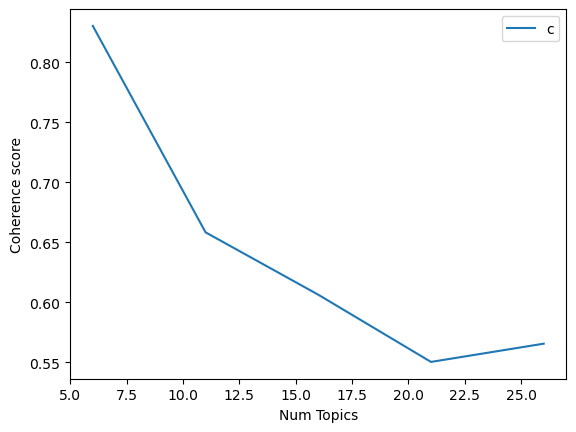

In [26]:
# Plotting coherence scores based on number of topics
start=6; limit=30; step=5
x = range(start, limit, step)
plt.plot(x, coherence_values_comments)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

This model demonstrates that the highest coherence score attainable in the comments data topic divisions would be six topics, and only decreases the coherence value as the topic number increases.

In [27]:
# Printing Coherence Values
c = 0
for m, cv in zip(x, coherence_values_comments):
    print(f"model_list[{c}]: Num Topics = {m}, Coherence Value = {round(cv, 4)}")
    c += 1

model_list[0]: Num Topics = 6, Coherence Value = 0.8303
model_list[1]: Num Topics = 11, Coherence Value = 0.6582
model_list[2]: Num Topics = 16, Coherence Value = 0.6062
model_list[3]: Num Topics = 21, Coherence Value = 0.5502
model_list[4]: Num Topics = 26, Coherence Value = 0.5654


### Modeling
I have opted to use model_list[0] because it yeilds the highest coherence score.

In [28]:
optimal_lda_model_comments = model_list[0]
optimal_lda_model_comments.save('Models/abortioncomments_pos_lda_optimal.model')

In [29]:
lda_viz_comments = gensimvis.prepare(optimal_lda_model_comments, pos_corpus_comments, pos_dictionary_comments)
lda_viz_comments

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.250835 -0.031820       1        1  24.982084
5      0.259882 -0.003758       2        1  21.614131
4     -0.212068  0.119322       3        1  19.440348
2     -0.230940 -0.360984       4        1  18.102511
1      0.157292  0.034728       5        1   9.473186
3     -0.225001  0.242512       6        1   6.387740, topic_info=           Term           Freq          Total Category  logprob  loglift
23     abortion  266949.000000  266949.000000  Default  30.0000  30.0000
1160    message  133546.000000  133546.000000  Default  29.0000  29.0000
287           r   68530.000000   68530.000000  Default  28.0000  28.0000
365     contact   82712.000000   82712.000000  Default  27.0000  27.0000
244     medical   42601.000000   42601.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
23     abortion   81524.553295  266949.257731   Topic6  -1.3216   1.5646
12        story    3074.775320    6374.886486   Topic6  -4.5993   2.0217
104       legal    4089.810029   16421.924638   Topic6  -4.3141   1.3607
1205  subreddit    1594.737216   16997.187039   Topic6  -5.2558   0.3845
9        people    2560.221295   46746.629750   Topic6  -4.7825  -0.1539

[318 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
801       6  0.976428         =
7011      6  0.999924  ab64e640
174       1  0.127637      able
174       2  0.095822      able
174       3  0.710056      able
...     ...       ...       ...
126       1  0.999960      year
4085      1  0.999927         ❤
4252      5  0.999491         ️
6623      4  0.973518         🏼
4105      6  0.995915         😊

[387 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 3, 2, 4])

From an initial look, the comments topic model has three general areas of topic similarity. Using close reading of this model I would summarize the three topics as 
   1) Emergency situations and urgent calls for help, 
   2) Unrest within legal frameworks for abortion, and 
   3) Decision-making surrounding procedure, relationships, and location. 
   
We will see how my close reading matches up with distant through the code below.

### Naming Topics

In [30]:
model_topics_comments = optimal_lda_model_comments.show_topics(formatted=False)
pprint(optimal_lda_model_comments.print_topics(num_words=20))

[(0,
  '0.029*"abortion" + 0.024*"time" + 0.019*"decision" + 0.017*"good" + '
  '0.017*"right" + 0.017*"life" + 0.016*"pregnancy" + 0.016*"thing" + '
  '0.015*"child" + 0.013*"baby" + 0.013*"pregnant" + 0.013*"way" + '
  '0.012*"choice" + 0.012*"feeling" + 0.010*"people" + 0.009*"year" + '
  '0.009*"situation" + 0.009*"love" + 0.009*"lot" + 0.008*"sorry"'),
 (1,
  '0.086*"medical" + 0.071*"information" + 0.046*"advice" + 0.042*"number" + '
  '0.041*"local" + 0.040*"treatment" + 0.040*"source" + 0.034*"subreddit" + '
  '0.027*"legal" + 0.026*"people" + 0.019*"good" + 0.015*"help" + '
  '0.014*"thank" + 0.013*"state" + 0.010*"post" + 0.009*"support" + '
  '0.009*"glad" + 0.009*"question" + 0.008*"access" + 0.008*"option"'),
 (2,
  '0.154*"message" + 0.075*"contact" + 0.062*"action" + 0.062*"private" + '
  '0.062*"moderator" + 0.061*"user" + 0.035*"abortion" + 0.033*"concern" + '
  '0.031*"community" + 0.031*"supportive" + 0.031*"hard" + '
  '0.031*"compose/?to=/r" + 0.031*"subreddit](/me

In [31]:
topic_names_comments = {0: 'Personal Reflections and Choices', 
               1: 'Helpful Resources', 
               2: 'Community Moderation and Support', 
               3: 'Understanding Medical Procedures',
               4: 'Legal Struggles', 
               5: 'Medical Questions',} 

For the topic names, I wanted the comments dataset to be somewhat paralell to the topics we will see in the submissions data. Obviously the topics are slightly different but the overlap is interesting. For instance, both from the comments data one of the topics is "personal reflections and choices" which as we'll delve into below, you'll see that topic emulates the "decision-making" topic from the submissions data.

## Topic Modeling: Submissions

In [32]:
# Remove all rows that are '[removed]' or '[deleted]' for pp_text
topics_subs_df = submissions_df.loc[~submissions_df['pp_text'].isin(['[removed]', '[deleted]' ]),:]

# Select only rows that have >5 characters in selftext for pp_text
topics_subs_df = submissions_df.loc[submissions_df['pp_text'].str.len() > 5]

In [33]:
# Creating a dictionary
lemmas_split_subs = [lemma.split() for lemma in tqdm(topics_subs_df['pp_text'])]
dictionary_subs = corpora.Dictionary(tqdm(lemmas_split_subs))
dictionary_subs.filter_extremes(no_below=10, no_above=0.4)
dictionary_subs.compactify() 
dictionary_subs.save('Dictionaries/abortionsubmissions.dict')
corpus_subs = [dictionary_subs.doc2bow(text) for text in tqdm(lemmas_split_subs)]

100%|██████████████████████████████████| 27376/27376 [00:00<00:00, 45164.62it/s]


In [34]:
%time
lda_model_subs = LdaModel(corpus=tqdm(corpus_subs),
            id2word=dictionary_subs,
            num_topics=10,
            random_state=100,
            passes=2,
            per_word_topics=False)
pyLDAvis.enable_notebook()
lda_viz_subs = gensimvis.prepare(lda_model_subs, corpus_subs, dictionary_subs)
lda_viz_subs

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs


100%|███████████████████████████████████| 27376/27376 [00:05<00:00, 5024.65it/s]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.033215  0.135178       1        1  18.574886
8     -0.053442  0.185781       2        1  18.030651
7     -0.125360 -0.176830       3        1  12.149937
9     -0.103175 -0.032404       4        1  11.788651
0     -0.176038 -0.038794       5        1   9.673575
1     -0.040389 -0.015693       6        1   9.360734
4      0.048435 -0.103747       7        1   6.817767
5      0.006139  0.149941       8        1   5.876201
3      0.173500 -0.017204       9        1   5.112124
2      0.237115 -0.086228      10        1   2.615475, topic_info=          Term          Freq         Total Category  logprob  loglift
1135  bleeding  10127.000000  10127.000000  Default  30.0000  30.0000
263      pills   8910.000000   8910.000000  Default  29.0000  29.0000
535          m   4723.000000   4723.000000  Default  28.0000  28.0000
662     period  10145.000000  10145.000000  Default  27.0000  27.0000
672       test   6183.000000   6183.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
353        got    333.442856  11864.024152  Topic10  -5.0721   0.0719
68        time    323.813105  16800.891444  Topic10  -5.1014  -0.3053
260       long    267.756616   5089.168304  Topic10  -5.2915   0.6989
440      found    257.614181   7876.394359  Topic10  -5.3301   0.2236
645       days    256.451038  10796.476780  Topic10  -5.3346  -0.0963

[858 rows x 6 columns], token_table=      Topic      Freq Term
term                      
276       1  0.047704    $
276       3  0.003786    $
276       4  0.163556    $
276       5  0.009086    $
276       7  0.615606    $
...     ...       ...  ...
6426      1  0.012513    😞
6426     10  0.975977    😞
8024      7  0.974916    😢
7501      7  0.985678    🙏
7729      6  0.978434    🤦

[3333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 8, 10, 1, 2, 5, 6, 4, 3])

Compared to the comments topic model, the submissions topic model seen above shows more fluidity between topic sections, whereas the comments model has three very distinct sections. I suspect that is due to the fact that comments on this site are generally all responding with empathy, medical information, and online resources to submissions that vary much more in topics.

### Tweaking

In [35]:
def POS(text_subs, allowed_postags = ['NOUN', 'ADJ']):
    parsed_subs = nlp(text_subs)
    return [token.lemma_ for token in parsed_subs if token.pos_ in allowed_postags]

In [36]:
pos_lemmas_split_subs = [POS(text) for text in tqdm(topics_subs_df['pp_text'])]

100%|█████████████████████████████████████| 27376/27376 [06:18<00:00, 72.30it/s]


In [37]:
with open('Tweaked Data/abortionsubmissions_pos_lemmas.json', 'w' ) as write:
    json.dump(pos_lemmas_split_subs, write)

In [38]:
str_pos_lemmas_subs = [' '.join(t) for t in pos_lemmas_split_subs]

In [39]:
topics_subs_df['pos_lemmas_subs'] = str_pos_lemmas_subs

/var/folders/9q/6g8vlvxx6slcp43g6vr27drr0000gn/T/ipykernel_32102/1528302999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_subs_df['pos_lemmas_subs'] = str_pos_lemmas_subs


In [40]:
topics_subs_df.to_csv('Tweaked Data/abortionssubmissions_pos_lemmas.csv', index=False)

In [41]:
pos_dictionary_subs = corpora.Dictionary(tqdm(pos_lemmas_split_subs))
pos_dictionary_subs.filter_extremes(no_below=10, no_above=0.4)
pos_dictionary_subs.compactify() 
pos_dictionary_subs.save('Dictionaries/abortionsubmissions_pos_lda.dict') 
pos_corpus_subs = [pos_dictionary_subs.doc2bow(text_subs) for text_subs in tqdm(pos_lemmas_split_subs)]

100%|██████████████████████████████████| 27376/27376 [00:00<00:00, 81347.82it/s]


In [42]:
logging.basicConfig(filename='Tweaked Data/gensim_abortion_subs.log', filemode='w', format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)

In [43]:
lda_model_tweak_subs = LdaModel(corpus=tqdm(pos_corpus_subs),
                           id2word=pos_dictionary_subs,
                           num_topics=20,
                           random_state=100,
                           eval_every=1,
                           passes=5,
                           per_word_topics=False)

100%|███████████████████████████████████| 27376/27376 [00:09<00:00, 2877.29it/s]


### Calculating Coherence

In [44]:
coherence_model_subs = CoherenceModel(model=lda_model_tweak_subs, corpus=pos_corpus_subs, texts=tqdm(pos_lemmas_split_subs), dictionary=pos_dictionary_subs, coherence='c_v') 
coherence_subs = coherence_model_subs.get_coherence()
print('\nCoherence Score: ', coherence_subs)

100%|███████████████████████████████████| 27376/27376 [00:04<00:00, 6626.78it/s]



Coherence Score:  0.46730979812053847


This coherence score of 0.4673 is good, but way worse than the coherence score of the comments data which was 0.602. This makes sense when looking at the topic models because the comments topic model has three very distinct areas whereas the Submissions topic model has circles (topics) all over the graph, meaning the topics are all individually distinct but dont overlap with each other in the same way that the comments data topics do.

In [45]:
def compute_coherence_values(dictionary_subs, corpus_subs, texts, start, limit, step):
    coherence_values_subs = []
    model_list = []
    passes = 5
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaModel(corpus=corpus_subs, id2word=dictionary_subs, num_topics=num_topics, random_state=100, 
                         update_every=1, passes=passes, alpha='auto', per_word_topics=False)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary_subs, coherence='c_v') 
        coherence_values_subs.append(coherencemodel.get_coherence())
    return model_list, coherence_values_subs

In [46]:
model_list, coherence_values_subs = compute_coherence_values(dictionary_subs=pos_dictionary_subs, 
                                                        corpus_subs=pos_corpus_subs, texts=pos_lemmas_split_subs, 
                                                        start=6, limit=30, step=5)

100%|█████████████████████████████████████████████| 5/5 [01:57<00:00, 23.48s/it]


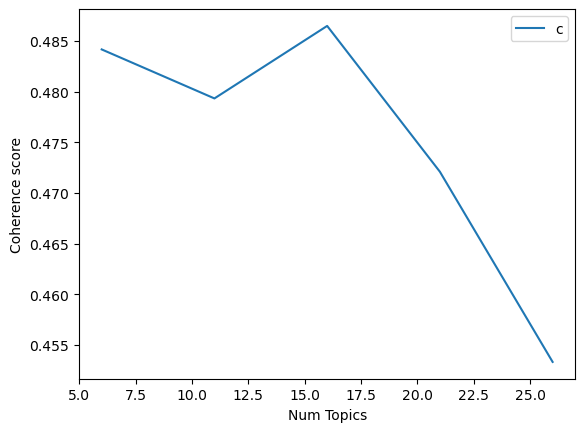

In [47]:
start=6; limit=30; step=5
x = range(start, limit, step)
plt.plot(x, coherence_values_subs)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

This model indicates that the highest possible coherence score would come from using 16 topics, however 6 topics yeilds only 0.023 lower coherence score, and as the comments dataset uses 6 topics, I am opting to also use 6 for the submissions on the basis of easier comparison.

In [48]:
c = 0
for m, cv in zip(x, coherence_values_subs):
    print(f"model_list[{c}]: Num Topics = {m}, Coherence Value = {round(cv, 4)}")
    c += 1

model_list[0]: Num Topics = 6, Coherence Value = 0.4842
model_list[1]: Num Topics = 11, Coherence Value = 0.4793
model_list[2]: Num Topics = 16, Coherence Value = 0.4865
model_list[3]: Num Topics = 21, Coherence Value = 0.4721
model_list[4]: Num Topics = 26, Coherence Value = 0.4533


### Modeling

In [49]:
optimal_lda_model_subs = model_list[0]
optimal_lda_model_subs.save('Models/abortionsubmissions_pos_lda_optimal.model')

In [50]:
lda_viz_subs = gensimvis.prepare(optimal_lda_model_subs, pos_corpus_subs, pos_dictionary_subs)
lda_viz_subs

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.118780  0.042897       1        1  40.643442
0      0.172099 -0.099163       2        1  16.827130
2      0.018932 -0.182536       3        1  12.273228
3      0.000878 -0.013455       4        1  11.997070
4      0.170069  0.210462       5        1   9.674689
5     -0.243198  0.041795       6        1   8.584440, topic_info=           Term          Freq         Total Category  logprob  loglift
382      period  11491.000000  11491.000000  Default  30.0000  30.0000
387        test   6967.000000   6967.000000  Default  29.0000  29.0000
144        pill  15208.000000  15208.000000  Default  28.0000  28.0000
87    pregnancy  14213.000000  14213.000000  Default  27.0000  27.0000
17         baby  11887.000000  11887.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
614  parenthood    558.730896   2393.135436   Topic6  -5.1735   1.0005
190       thank    579.798190   2909.605493   Topic6  -5.1365   0.8421
37         time    741.948657  18868.888325   Topic6  -4.8899  -0.7808
246        able    533.696298   5317.659749   Topic6  -5.2193   0.1563
15     question    503.789676   2730.469127   Topic6  -5.2770   0.7651

[476 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3438      1  0.008122       15th
3438      2  0.032488       15th
3438      5  0.958409       15th
3516      5  0.985315       22nd
1901      5  0.994575       28th
...     ...       ...        ...
337       5  0.174283  yesterday
337       6  0.003521  yesterday
3687      6  0.982351          😞
4359      1  0.149397          😭
4359      5  0.845026          😭

[1123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5, 6])

### Naming Topics

In [51]:
model_topics = optimal_lda_model_subs.show_topics(formatted=False)
pprint(optimal_lda_model_subs.print_topics(num_words=20))

[(0,
  '0.037*"pill" + 0.035*"pain" + 0.033*"hour" + 0.025*"cramp" + 0.024*"clot" + '
  '0.021*"blood" + 0.019*"bad" + 0.018*"bleeding" + 0.015*"normal" + '
  '0.013*"pad" + 0.013*"period" + 0.011*"heavy" + 0.011*"time" + '
  '0.011*"experience" + 0.011*"nausea" + 0.010*"lot" + 0.010*"misoprostol" + '
  '0.009*"night" + 0.009*"minute" + 0.009*"light"'),
 (1,
  '0.025*"baby" + 0.023*"time" + 0.018*"child" + 0.018*"life" + 0.017*"year" + '
  '0.014*"decision" + 0.013*"thing" + 0.012*"pregnancy" + 0.011*"right" + '
  '0.011*"good" + 0.010*"month" + 0.010*"boyfriend" + 0.010*"kid" + '
  '0.009*"family" + 0.009*"friend" + 0.008*"partner" + 0.008*"support" + '
  '0.008*"choice" + 0.008*"way" + 0.007*"bad"'),
 (2,
  '0.030*"procedure" + 0.025*"room" + 0.021*"nurse" + 0.016*"pain" + '
  '0.016*"minute" + 0.013*"doctor" + 0.012*"time" + 0.011*"appointment" + '
  '0.011*"hour" + 0.010*"ultrasound" + 0.010*"experience" + 0.009*"sedation" + '
  '0.008*"home" + 0.008*"thing" + 0.008*"woman" + 0.008

In [52]:
topic_names_subs = {0: 'Medical Complications', 
               1: 'Supportive Circles, Relationships, Family', 
               2: 'Experience During Procedure', 
               3: 'Hospital/Clinic Experience, Doctors',
               4: 'Early stages, unknown, fear', 
               5: 'Emergency Situations',} 

### Comparing Topic Groups Between Submissions and Comments
The topic models for comments and submissions to r/abortion highlight a contrasting focus between the two types of interactions. Submissions tend to delve into personal experiences, emphasizing emotional reflections surrounding medical complications (Topic 0) and the nuances of supportive relationships and family dynamics (Topic 1). Many submissions share intimate accounts of the experience during procedures (Topic 2) and the complexities of emergency situations (Topic 5), showcasing the deeply personal nature of the topic.

In contrast, comments typically present more practical solutions from a less emotional standpoint. They emphasize helpful resources (Topic 1) and community support structures (Topic 2), reflecting a collective effort to navigate the abortion experience. Additionally, discussions around understanding medical procedures (Topic 3) and legal struggles (Topic 4) indicate a focus on information dissemination and problem-solving. Overall, submissions capture the emotive and personal aspects of abortion experiences, while comments serve as a platform for addressing practical concerns and community-driven support.

## Word Embeddings Model: Comments

In [53]:
# Remove all rows that are '[removed]' or '[deleted]'
emb_comments_df = comments_df.loc[~comments_df['pp_text'].isin(['[removed]', '[deleted]' ]),:]

# Select only rows that have >5 characters in selftext
emb_comments_df = comments_df.loc[comments_df['pp_text'].str.len() > 5]

In [54]:
lemmas_split = [lemma.split() for lemma in tqdm(emb_comments_df['pp_text'])]

100%|███████████████████████████████| 237219/237219 [00:00<00:00, 604378.27it/s]


In [55]:
# Constructing a Word2vec model
cores = multiprocessing.cpu_count()
n_features = 300
min_word_count = 10
n_workers = cores
window = 5
downsampling = 1e-2
seed = 1
sg = 1
epochs = 20 
model_emb_comments = Word2Vec(
    sentences=lemmas_split,
    workers=n_workers,
    vector_size=n_features,
    min_count=min_word_count,
    window=window,
    sample=downsampling,
    seed=seed,
    sg=sg)

In [56]:
# Saving Model
model_emb_comments.save('Word Embeddings/comments.emb')

In [57]:
# Loading Model
model_emb_comments = Word2Vec.load('Word Embeddings/comments.emb')

### Word Similarity

In [58]:
def get_most_similar_terms(model_emb_comments, token, topn=20):
    for word, similarity in model_emb_comments.wv.most_similar(positive=[token], topn=topn):
        print(f"{word}: {round(similarity, 3)}")

In [59]:
get_most_similar_terms(model_emb_comments, 'man')

guy: 0.592
scumbag: 0.574
cheat: 0.571
deadbeat: 0.571
asshat: 0.568
disagreement: 0.564
faithful: 0.559
trapping: 0.557
bd: 0.555
fathered: 0.551
bail: 0.55
stepdad: 0.549
marry: 0.548
fling: 0.547
loser: 0.546
father: 0.546
abandon: 0.545
ultimatums: 0.54
disrespecting: 0.54
keeper: 0.54


In [60]:
get_most_similar_terms(model_emb_comments, 'women')

web](https://www.womenonweb.org/: 0.678
safe2choose](https://safe2choose.org/: 0.655
women](https://www.womenhelp.org: 0.625
women](https://www.womenhelp.org/: 0.545
https://www.womenonweb.org/](https://www.womenonweb.org/: 0.534
illegal: 0.508
www.rachelsvineyard.com: 0.499
socialized: 0.494
https://www.womenonweb.org/: 0.491
ilegal: 0.49
https://www.womenonweb.org/en/i-need-an-abortion: 0.485
nova: 0.484
ngos: 0.481
abortion/).**if: 0.48
jailed: 0.479
african: 0.478
en/: 0.477
afab: 0.471
topics: 0.466
womenhelp.org](https://womenhelp.org: 0.463


These results are interesting because for the submissions data, the list of similar words to "women" doesn't include a single website link. I thought at first I made a mistake while preprocessing the text, but when I used the same data to find similar words to "men" (below) none of the words were links like above. So, I believe this indicates that commenters provide more links than submission writers. This makes sense because the commenters are providing women who submit inquiries or issues surrounding abortion with online resources to help them, whereas submissions are where the requests for further information are made.

In [61]:
get_most_similar_terms(model_emb_comments, 'men')

males: 0.597
dudes: 0.581
cis: 0.572
hypocrisy: 0.55
brunt: 0.521
centuries: 0.513
sexism: 0.512
demonize: 0.511
effing: 0.511
damned: 0.509
stereotypes: 0.509
predators: 0.507
reproduction: 0.507
dominated: 0.507
idiots: 0.506
tragedies: 0.505
sexist: 0.503
patriarchy: 0.502
stupidity: 0.498
programmed: 0.497


"men" and "man" (plural vs. singular) both have negative connotations in the commentsd. Likely because when the comments discuss a certain "man" it is not someone they know but someone referenced in the submission. I am finding similar words to "men" and "women" to guide the words I insert into the visualization below. I aim to find the relationship between gender and language bias within the abortion subreddit in this section.

### Visualizing Similarity of Words

In [63]:
words_comments = ['cis', 'males', 'men', 'narcissist','predators',
         'manipulate','shame','cheater','dominated',
         'bastards','divorced','toxic','dicks', 'dudes',
        'husband','father','son','brother','boyfriend','heartbroken','abortion',]

# Extracting word vectors
word_vectors_comments = np.array([model_emb_comments.wv[word] for word in words_comments])

In [64]:
# Reduce dimensionality
tsne = TSNE(n_components=2, random_state=2, perplexity=2)
reduced_vectors_comments = tsne.fit_transform(word_vectors_comments)

In [65]:
# Store the t-SNE vectors
words_df_comments = pd.DataFrame(reduced_vectors_comments,
                            index=pd.Index([word for word in words_comments]),
                            columns=['x', 'y'])

In [66]:
# Creating the plot and adding a hover tool
plot_data = ColumnDataSource(words_df_comments)
tsne_plot_comments = figure(title='t-SNE Word Embeddings Comments')
tsne_plot_comments.add_tools(HoverTool(tooltips='@index'))

# Plotting the words as circles
tsne_plot_comments.circle('x', 'y',
                 source=plot_data,
                 color='green',
                 size=8,
                 hover_line_color='black')

# Labeling Axes
labels = LabelSet(x='x', y='y', text='index', level='glyph',
                  x_offset=5, y_offset=5, source=plot_data)
tsne_plot_comments.add_layout(labels)
show(tsne_plot_comments)

Lets delve into what the word embeddings model for the comments dataset shows us. On first glance it's apparent that language biased towards close romantic relationships with men (husband and boyfriend) is less critical than more general descriptions of men such as "males" and "dudes." This is shown by the distance between the words "husband" and "boyfriend" and the insults "narcissist", "dicks", "predators", and "bastards." Another interesting note about this model is that the words familial terms "brother", "son", and "father" are all closely tied to "divorced", "heartbroken", and "cheater." I suspect this is because when discussing abortion, I would assume issues like a soon to be ***father*** causing his wife or girlfriend to be ***heartbroken*** because he was a ***cheater*** come up fairly often, tying these terms together. Adding on to that, follow up words like the couple getting ***divorced*** and that impacting the ***son*** or ***brother*** make sense that they are in the mix. In the larger scheme of my research, it's important to note that the model places "abortion" closest in proximity to "dominated" "cis" and "shame." The word "dominated" stuck out to me as a good example of the close relationship between the patriarchy and abortion. "Dominated" came up as one of the 20 most similar words to "men" in the comments data, arguably because a lot of the time--especially within the realm of women deciding whether or not to have an abortion--male voices and opinions can feel dominating.

## Word Embeddings Model: Submissions

In [67]:
# Remove all rows that are '[removed]' or '[deleted]'
emb_subs_df = submissions_df.loc[~submissions_df['pp_text'].isin(['[removed]', '[deleted]' ]),:]

# Select only rows that have >5 characters in selftext
emb_subs_df = submissions_df.loc[submissions_df['pp_text'].str.len() > 5]

In [68]:
lemmas_split = [lemma.split() for lemma in tqdm(emb_subs_df['pp_text'])]

100%|█████████████████████████████████| 27376/27376 [00:00<00:00, 250939.78it/s]


In [69]:
cores = multiprocessing.cpu_count()
n_features = 300
min_word_count = 10
n_workers = cores
window = 5
downsampling = 1e-2
seed = 1
sg = 1
epochs = 20 
model_emb_subs = Word2Vec(
    sentences=lemmas_split_subs,
    workers=n_workers,
    vector_size=n_features,
    min_count=min_word_count,
    window=window,
    sample=downsampling,
    seed=seed,
    sg=sg)

In [70]:
model_emb_subs.save('Word Embeddings/subs.emb')

In [71]:
model_emb_subs = Word2Vec.load('Word Embeddings/subs.emb')

### Word Similarity

In [72]:
def get_most_similar_terms(model_emb_subs, token, topn=20):
    for word, similarity in model_emb_subs.wv.most_similar(positive=[token], topn=topn):
        print(f"{word}: {round(similarity, 3)}")

In [73]:
get_most_similar_terms(model_emb_subs, 'women')

woman: 0.552
empower: 0.511
womens: 0.511
stigmatized: 0.494
backgrounds: 0.49
girls: 0.488
people: 0.485
ladies: 0.48
advocate: 0.478
females: 0.477
norm: 0.473
platform: 0.471
equality: 0.468
firsthand: 0.467
propaganda: 0.466
statistics: 0.465
admire: 0.462
judgements: 0.462
uteruses: 0.455
advocating: 0.454


In [74]:
get_most_similar_terms(model_emb_subs, 'man')

guy: 0.621
soulmate: 0.59
madly: 0.578
faithful: 0.577
marry: 0.575
compatible: 0.565
eachother: 0.559
dude: 0.558
manipulated: 0.557
impregnated: 0.557
divorced: 0.555
coparenting: 0.549
marrying: 0.547
rebound: 0.546
narcissist: 0.544
consensual: 0.542
despise: 0.539
fiancee: 0.539
hypothetically: 0.538
grandchildren: 0.537


In [75]:
get_most_similar_terms(model_emb_subs, 'men')

perceived: 0.617
politicians: 0.597
guns: 0.596
generation: 0.58
constitution: 0.577
equality: 0.576
arguments: 0.571
bodies: 0.569
rights: 0.569
revolution: 0.567
agenda: 0.567
wives: 0.565
shaming: 0.565
empower: 0.565
humans: 0.563
irresponsibility: 0.563
fueled: 0.562
females: 0.561
bourgeois: 0.56
civil: 0.559


The first word closest to "man" is "soulmate" which tells me that when women are discussing men in a more general sense, they use harsher language than one man in particular. Likely this is because women have a weaker tie to wanting to protect their opinions of men in general than one man they know and are discussing. I have noticed in my life that I sometimes see behaivor in my male friends or family members that I do would group into to the ***bullshit*** and ***shaming*** category of similarity to "men" but don't call them out for it because in the back of my head I cut the men I know already in my life much more slack than I do strangers. It's also worth noting that "bodies" is used similarly to men, likely in the context of men controlling women's bodies through restricting abortion.

### Visualizing Similarity of Words

In [76]:
words_subs = ['men', 'narcissist', 'shaming',
         'manipulate','cheater','divorced','toxic','husband','father','brother','boyfriend','heartbroken','abortion',]
word_vectors_subs = np.array([model_emb_subs.wv[word] for word in words_subs])

In [77]:
tsne = TSNE(n_components=2, random_state=2, perplexity=2)
reduced_vectors_subs = tsne.fit_transform(word_vectors_subs)

In [78]:
words_df_subs = pd.DataFrame(reduced_vectors_subs,
                            index=pd.Index([word for word in words_subs]),
                            columns=['x', 'y'])

In [79]:
plot_data = ColumnDataSource(words_df_subs)
tsne_plot_subs = figure(title='t-SNE Word Embeddings Submissions')
tsne_plot_subs.add_tools(HoverTool(tooltips='@index'))
tsne_plot_subs.circle('x', 'y',
                 source=plot_data,
                 color='blue',
                 size=8,
                 hover_line_color='black')
labels = LabelSet(x='x', y='y', text='index', level='glyph',
                  x_offset=5, y_offset=5, source=plot_data)
tsne_plot_subs.add_layout(labels)
show(tsne_plot_subs)

Interestingly, using a similar word set as I did for the comments embedding model, the results are less conclusive from submissions. "Brother" is still closely related to "cheater" which I did not expect because when a woman is discussing cheating, in my experience, it's normally in regards to their boyfriend or husband, because we don't date our brothers and therefore can't be cheated on by them. Although, I haven't yet considered that "cheater" could be used in a different context than a relationship betrayal, it could be referencing a brother cheating at a game, which makes sense generally speaking but not so much within the context of r/abortion. Another note about this model is that "father" is much much closer to "toxic." It seems as though both datasets tend to discuss fathers in a more negative light. "Boyfriend" and "husband" are found closer to "narcissist" and "cheater" in the submissions model than the comments, likely because the submissions are personal stories and delve deeper into interpersonal relationships, and the comments just respond to the experience initially submitted. Similar to the comments, "boyfriend" and "husband" are further away in similarity to harsh language than "father" and "brother".

## Language Bias: Comments

In [80]:
target1 = ['partner', 'ex', 'boyfriend', 'stable', 
           'abusive', 'marriage', 'resent', 'breakup' 
           'unstable', 'divorce', 'husband','wife']
target2 = ['family', 'father', 'brother', 'mother', 'son', 'daughter', 
           'sister', 'related', 'dad', 'mom','parents','aunt',
           'siblings', 'cousin','uncle']

In [81]:
model_bias_comments = Word2Vec.load('Word Embeddings/comments.emb')

In [82]:
[b1, b2] = calculate_biased_words(model_bias_comments, target1, target2, 4)

In [83]:
print('Biased words in comments towards romantic relationships:')
print([word for word in b1.keys()])

Biased words in comments towards romantic relationships:
['relationship', 'man', 'guy', 'therapy', 'bf', 'leaving', 'relationships', 'pressured', 'toxic', 'vasectomy', 'behavior', 'resentment', 'communication', 'goals', 'manipulative', 'communicate', 'committed', 'unsupportive', 'flag', 'unstable', 'pressuring', 'coercion', 'flags', 'intimacy', 'engage', 'damaging', 'resenting']


In [84]:
print('Biased words in comments towards familial relationships')
print([word for word in b2.keys()])

Biased words in comments towards familial relationships
['friend', 'friends', 'called', 'california', 'groups', 'minor', 'bunch', 'random', 'special', 'company', 'sites', 'member', 'mum', 'tons', 'died', 'younger', 'birthday', 'teen', 'facebook', 'adopted', 'papers', 'ireland', 'named', 'code', 'photos', 'grandma', 'grandmother', 'announced', 'grandparents', 'niece']


### Visualizing Bias

In [85]:
tsne_path_comments = '../../data/tsne_model'
tsne_df_path_comments = '../../data/tsne_df.pkl'
with open(tsne_path_comments, 'rb') as f:
    X_tsne_comments = pickle.load(f)   
tsne_df_comments = pd.read_pickle(tsne_df_path_comments)

In [86]:
target1_idx = np.array([model_bias_comments.wv.key_to_index[key] for key in b1.keys()])
target2_idx = np.array([model_bias_comments.wv.key_to_index[key] for key in b2.keys()])

In [87]:
X_target1 = X_tsne_comments[target1_idx]
X_target2 = X_tsne_comments[target2_idx]

In [88]:
output_notebook()
p = figure()
source1 = ColumnDataSource(data=dict(x=X_target1[:, 0], y=X_target1[:, 1], label=[model_bias_comments.wv.index_to_key[idx] for idx in target1_idx]))
source2 = ColumnDataSource(data=dict(x=X_target2[:, 0], y=X_target2[:, 1], label=[model_bias_comments.wv.index_to_key[idx] for idx in target2_idx]))
p.scatter(x='x', y='y', color='lightgreen', size=8, source=source1)
p.scatter(x='x', y='y', color='purple', size=8, source=source2)
labels1 = LabelSet(x='x', y='y', text='label', x_offset=6, y_offset=3, source=source1)
p.add_layout(labels1)
labels2 = LabelSet(x='x', y='y', text='label', x_offset=6, y_offset=3, source=source2)
p.add_layout(labels2)
show(p)

Loading BokehJS ...

The words accompanied with purple dots in the model above demonstrate language bias towards familial relationships (parents, siblings, etc.) in the comments data of r/abortion while the green dots highlight words biased toward romantic partners. A few noticeable points in this model include:

   - "Blaming", "dick", and "boundaries" (all romantic biased words) fall very close to "grandma" and "birthday" (family leaning words.) My guess is that this is because ***birthdays*** are a sensitive time for most people, and there is often overlap between ***family*** and ***romantic partners*** crossing ***boundaries*** on birthdays because that is often when family and couples engage with eachother. Another word close by that backs this theory up is "handful," which likely is referencing when relatives and in laws from both sides of the family can be a lot to deal with, or a ***handful*** when they ***visit*** for ***birthdays***.
    
   - "Unsupportive" and "resentment" are both categorized as a language biases towards romantic partners (not family), which is interesting because I could have seen that word going either way. The language used negatively towards family and romantic partners seems to vary, understandably so, and I hope to further explore exactly what the difference is through this project. 
    
   - Both "communicate" and "communication" are marked as romantic relationship bias but are in different spots (far away) in the model. "Communicate" is closest to "justified" (romantic), "handful" (familial), "birthday" (familial), and "blaming" (romantic) whereas "communication" is surrounded by "older", "member", "called", and "announced"--all of which are biased towards familial relationships. My first thought is that "communication" is used more generally, referring to the broader level of sharing and openness between two individuals, or many. For instance when a woman ***announces*** their pregnancy by ***calling*** some ***members*** of their family, they conducted a general act of ***communication***. On the other hand, "communicate" can be used on more of a situational basis to discuss an act happening in the moment. A partner can ***communicate*** with their romantic counterpart that they understand that their family is being a ***handful*** while ***visiting*** for a ***birthday***, thus making the individual feel more ***justifed***.
    
   - "Pressuring" is marked as a romantic bias, but is closest in proximity on the model to "mum" and "friends" which are both familial. In terms of abortion and romantic relationships, it makes sense that "pressuring" is categorized as such because it's not uncommon for a romantic partner to ***pressure*** their girlfriend into sex or having/not having an abortion. However, it is interesting that "mum" is so close to the "pressuring" in the model, indicating that a large amount of pressure women feel when discussing abortion may also stem from our relationships with our mothers.

## Conclusions
   1. The predominant topics of discussion within this subreddit are requests for medical advice/resources, struggles with decision making, and rants about emotional repercussions of an abortion. 
   2. My research and models show that within the realm of abortion discussions in a pro-choice space,  language biased towards men is harsher surrounding close romantic relationships than familial ones. 
   3. However, there is a lot of negative sentiment towards fathers. Throughout the subreddit the bias towards men is evidently a lot stronger in a negative sense towards men than women, although that makes sense since the only biological gender able to get abortions are women, so the page is predominantly written by and for women, minimizing the negative language towards women. 
   4. Pressure and shame surrounding abortion discussions can stem from both familial relationships as well as romantic
   5. "bodies" is a term embedded most similarly to "men"--indicating that women discuss their bodies within the context of men controlling them via abortion laws.

## References

Figure 1: “Abortion Laws by State.” Center for Reproductive Rights, https://reproductiverights.org/maps/abortion-laws-by-state/. Accessed 10 Aug. 2024.

Figure 2: “Abortion.” n.d. Accessed August 14, 2024. https://www.reddit.com/r/abortion/wiki/rules/.

In [93]:
# This code cell will give you a word count, in case you need it. 
# Note that this opens the file you are currently in, so make sure to save it first to get an accurate word count.

with open('DIGHUM160_essay_morrisbenedict.ipynb',encoding='utf-8') as json_file:
    data = json.load(json_file)

wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            # you might want to filter for more markdown keywords here
            temp = [word for word in line.split() if "#" not in word] 
            wordCount = wordCount + len(temp)
            
print(wordCount)

3061
